In [28]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [36]:
# Load in csv
Temp_CO2_Merged = pd.read_csv('temp_co2_merged_data.csv')
Temp_CO2_Merged

,Continent,Country,Temp_1995,Temp_1996,Temp_1997,Temp_1998,Temp_1999,Temp_2000,Temp_2001,Temp_2002,...,CO2_2011,CO2_2012,CO2_2013,CO2_2014,CO2_2015,CO2_2016,CO2_2017,CO2_2018,CO2_2019,CO2_2020
0,Europe,Albania,NaN,NaN,71.934783,61.612500,63.116961,63.176945,61.235600,63.301266,...,1.768109,1.565921,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550
1,Africa,Algeria,64.410468,63.530220,64.926301,63.619668,64.923626,64.182787,64.669863,64.135457,...,3.305233,3.621368,3.658469,3.811521,3.951961,3.833834,3.833681,3.924299,3.994402,3.718223
2,South America,Argentina,61.701370,62.710109,63.143836,61.761111,61.835714,62.396164,63.339835,63.006667,...,4.281028,4.264111,4.342250,4.209112,4.301914,4.201816,4.070112,3.975651,3.742030,3.405618
3,Oceania,Australia,61.501753,61.255799,62.151781,62.200846,62.472363,62.250219,62.229066,62.690333,...,17.656055,17.405618,16.794588,16.155745,16.198458,16.320331,16.149150,15.865714,15.599045,14.776137
4,Europe,Austria,50.251233,47.676776,49.682740,51.337950,50.955220,52.759563,50.823014,51.868975,...,8.136190,7.723852,7.754018,7.260931,7.318860,7.290777,7.487037,7.141140,7.263331,6.632646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Asia,United Arab Emirates,80.795479,81.842896,80.818219,83.738643,83.344368,82.325000,82.520000,82.972299,...,19.431780,20.275652,21.133916,21.122774,21.914502,22.280703,21.165498,19.060950,20.153345,20.252272
95,Europe,United Kingdom,53.400960,51.794118,52.673800,51.775900,52.106749,51.438219,51.062277,51.857836,...,7.044843,7.344261,7.076100,6.433347,6.159376,5.824503,5.553291,5.425128,5.175842,4.601142
96,South America,Uruguay,59.627945,60.188798,60.920000,59.842659,59.691758,60.413973,61.881319,61.236389,...,2.262558,2.526658,2.176045,1.916582,1.956379,1.911408,1.783590,1.910015,1.985382,1.899719
97,Asia,Uzbekistan,59.083014,57.181967,60.764244,59.678526,60.313187,60.786339,61.317260,60.861773,...,4.384333,3.799903,3.698567,3.409634,3.174495,3.307405,3.387257,3.420323,3.504663,3.376304


In [39]:
# Set x axis and tick locations
x_axis = np.arange(len(Temp_CO2_Merged))
tick_locations = [value+0.4 for value in x_axis]

In [40]:
Temp_CO2_Merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 54 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Continent  99 non-null     object 
 1   Country    99 non-null     object 
 2   Temp_1995  95 non-null     float64
 3   Temp_1996  96 non-null     float64
 4   Temp_1997  98 non-null     float64
 5   Temp_1998  96 non-null     float64
 6   Temp_1999  96 non-null     float64
 7   Temp_2000  95 non-null     float64
 8   Temp_2001  96 non-null     float64
 9   Temp_2002  97 non-null     float64
 10  Temp_2003  98 non-null     float64
 11  Temp_2004  97 non-null     float64
 12  Temp_2005  97 non-null     float64
 13  Temp_2006  99 non-null     float64
 14  Temp_2007  95 non-null     float64
 15  Temp_2008  93 non-null     float64
 16  Temp_2009  93 non-null     float64
 17  Temp_2010  96 non-null     float64
 18  Temp_2011  94 non-null     float64
 19  Temp_2012  91 non-null     float64
 20  Temp_2013  9

In [41]:
# Define a function that finds the min and max in a row
def find_min_max_row(Temp_CO2_Merged, row_index):
    # Filter columns to include only those with "temp" in their names
    temp_columns = [col for col in Temp_CO2_Merged.columns if "temp" in col.lower()]

    # Initialize min and max with the first value of the filtered columns
    if temp_columns:
        min_val = Temp_CO2_Merged[temp_columns].iloc[row_index, 0]
        max_val = Temp_CO2_Merged[temp_columns].iloc[row_index, 0]
    else:
        return None, None  # Return None if no columns with "temp" are found

    # Loop through each value in the filtered columns
    for value in Temp_CO2_Merged[temp_columns].iloc[row_index]:
        if value < min_val:
            min_val = value
        if value > max_val:
            max_val = value

    return min_val, max_val
min_list = []
max_list = []
# Loop through the rows of the DataFrame
for row_index in Temp_CO2_Merged.index:
    # Find the min and max values for the row
    min_max = find_min_max_row(Temp_CO2_Merged, row_index)
    # Append the result to the min_maxlist
    # min_maxlist.append(min_max)
    min_list.append(min_max[0])
    max_list.append(min_max[1])
min_list

[nan,
 58.03432835820893,
 61.32142857142857,
 61.25579868708968,
 44.924626865671655,
 72.23880597014929,
 75.64156626506025,
 79.15827338129498,
 38.00756302521007,
 46.91567164179104,
 78.16607142857143,
 80.90614525139664,
 44.212295081967206,
 70.36023875114795,
 42.10820895522389,
 54.52765957446802,
 24.879400749063667,
 77.77566539923953,
 52.2023916292974,
 55.08333333333332,
 71.4870879120879,
 nan,
 74.42739726027399,
 58.12142857142856,
 42.32761194029851,
 77.79473684210527,
 61.438492063492085,
 36.508955223880605,
 50.81641791044776,
 78.33251366120213,
 43.23669724770645,
 43.01343283582088,
 60.161006289308204,
 65.83186813186815,
 80.70000000000006,
 81.03722222222221,
 nan,
 81.77499999999999,
 69.82770083102496,
 43.4082089552239,
 35.07388059701493,
 77.56467289719627,
 81.89090909090915,
 44.6641791044776,
 68.47750000000002,
 50.23992537313435,
 46.46094527363186,
 54.119402985074615,
 42.75187969924813,
 65.20121212121208,
 69.07164179104478,
 39.82686567164178,

In [42]:
max_list

[nan,
 65.64697802197797,
 69.98432835820897,
 68.7164179104477,
 53.91222222222227,
 83.29861495844874,
 80.83544776119399,
 82.06191780821915,
 48.24945054945055,
 53.12609890109893,
 81.95838150289016,
 83.81119402985077,
 48.049253731343285,
 73.557855361596,
 53.543956043956,
 82.4,
 45.261855955678605,
 81.41343283582091,
 62.01704109589035,
 58.07014925373134,
 74.93955223880592,
 nan,
 77.2272997032641,
 90.1,
 49.88159340659342,
 81.13371104815863,
 66.15535714285716,
 44.920329670329686,
 56.87465753424661,
 82.79253731343283,
 58.17285318559559,
 52.09814600231746,
 67.12876712328763,
 68.16417910447763,
 83.88560606060608,
 84.30000000000001,
 nan,
 87.50718562874252,
 74.09586776859507,
 54.0376731301939,
 43.20164383561646,
 82.19559532002745,
 85.46666666666668,
 50.48904109589042,
 72.3535460992908,
 60.009141274238246,
 57.95868761552674,
 68.17808219178085,
 53.32252747252745,
 69.31626016260164,
 82.6441666666666,
 47.63698630136987,
 72.6569863013698,
 69.4395522388

In [43]:
Temp_CO2_Merged['Temp_min'] = min_list
Temp_CO2_Merged

,Continent,Country,Temp_1995,Temp_1996,Temp_1997,Temp_1998,Temp_1999,Temp_2000,Temp_2001,Temp_2002,...,CO2_2012,CO2_2013,CO2_2014,CO2_2015,CO2_2016,CO2_2017,CO2_2018,CO2_2019,CO2_2020,Temp_min
0,Europe,Albania,NaN,NaN,71.934783,61.612500,63.116961,63.176945,61.235600,63.301266,...,1.565921,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550,NaN
1,Africa,Algeria,64.410468,63.530220,64.926301,63.619668,64.923626,64.182787,64.669863,64.135457,...,3.621368,3.658469,3.811521,3.951961,3.833834,3.833681,3.924299,3.994402,3.718223,58.034328
2,South America,Argentina,61.701370,62.710109,63.143836,61.761111,61.835714,62.396164,63.339835,63.006667,...,4.264111,4.342250,4.209112,4.301914,4.201816,4.070112,3.975651,3.742030,3.405618,61.321429
3,Oceania,Australia,61.501753,61.255799,62.151781,62.200846,62.472363,62.250219,62.229066,62.690333,...,17.405618,16.794588,16.155745,16.198458,16.320331,16.149150,15.865714,15.599045,14.776137,61.255799
4,Europe,Austria,50.251233,47.676776,49.682740,51.337950,50.955220,52.759563,50.823014,51.868975,...,7.723852,7.754018,7.260931,7.318860,7.290777,7.487037,7.141140,7.263331,6.632646,44.924627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Asia,United Arab Emirates,80.795479,81.842896,80.818219,83.738643,83.344368,82.325000,82.520000,82.972299,...,20.275652,21.133916,21.122774,21.914502,22.280703,21.165498,19.060950,20.153345,20.252272,76.092424
95,Europe,United Kingdom,53.400960,51.794118,52.673800,51.775900,52.106749,51.438219,51.062277,51.857836,...,7.344261,7.076100,6.433347,6.159376,5.824503,5.553291,5.425128,5.175842,4.601142,46.648881
96,South America,Uruguay,59.627945,60.188798,60.920000,59.842659,59.691758,60.413973,61.881319,61.236389,...,2.526658,2.176045,1.916582,1.956379,1.911408,1.783590,1.910015,1.985382,1.899719,59.627945
97,Asia,Uzbekistan,59.083014,57.181967,60.764244,59.678526,60.313187,60.786339,61.317260,60.861773,...,3.799903,3.698567,3.409634,3.174495,3.307405,3.387257,3.420323,3.504663,3.376304,51.388060


In [44]:
Temp_CO2_Merged['Temp_max'] = max_list
Temp_CO2_Merged

,Continent,Country,Temp_1995,Temp_1996,Temp_1997,Temp_1998,Temp_1999,Temp_2000,Temp_2001,Temp_2002,...,CO2_2013,CO2_2014,CO2_2015,CO2_2016,CO2_2017,CO2_2018,CO2_2019,CO2_2020,Temp_min,Temp_max
0,Europe,Albania,NaN,NaN,71.934783,61.612500,63.116961,63.176945,61.235600,63.301266,...,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550,NaN,NaN
1,Africa,Algeria,64.410468,63.530220,64.926301,63.619668,64.923626,64.182787,64.669863,64.135457,...,3.658469,3.811521,3.951961,3.833834,3.833681,3.924299,3.994402,3.718223,58.034328,65.646978
2,South America,Argentina,61.701370,62.710109,63.143836,61.761111,61.835714,62.396164,63.339835,63.006667,...,4.342250,4.209112,4.301914,4.201816,4.070112,3.975651,3.742030,3.405618,61.321429,69.984328
3,Oceania,Australia,61.501753,61.255799,62.151781,62.200846,62.472363,62.250219,62.229066,62.690333,...,16.794588,16.155745,16.198458,16.320331,16.149150,15.865714,15.599045,14.776137,61.255799,68.716418
4,Europe,Austria,50.251233,47.676776,49.682740,51.337950,50.955220,52.759563,50.823014,51.868975,...,7.754018,7.260931,7.318860,7.290777,7.487037,7.141140,7.263331,6.632646,44.924627,53.912222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Asia,United Arab Emirates,80.795479,81.842896,80.818219,83.738643,83.344368,82.325000,82.520000,82.972299,...,21.133916,21.122774,21.914502,22.280703,21.165498,19.060950,20.153345,20.252272,76.092424,85.438356
95,Europe,United Kingdom,53.400960,51.794118,52.673800,51.775900,52.106749,51.438219,51.062277,51.857836,...,7.076100,6.433347,6.159376,5.824503,5.553291,5.425128,5.175842,4.601142,46.648881,53.400960
96,South America,Uruguay,59.627945,60.188798,60.920000,59.842659,59.691758,60.413973,61.881319,61.236389,...,2.176045,1.916582,1.956379,1.911408,1.783590,1.910015,1.985382,1.899719,59.627945,68.826119
97,Asia,Uzbekistan,59.083014,57.181967,60.764244,59.678526,60.313187,60.786339,61.317260,60.861773,...,3.698567,3.409634,3.174495,3.307405,3.387257,3.420323,3.504663,3.376304,51.388060,62.284658


In [45]:
Temp_CO2_Merged['Temp_difference'] = Temp_CO2_Merged['Temp_max'] - Temp_CO2_Merged['Temp_min']
Temp_CO2_Merged

,Continent,Country,Temp_1995,Temp_1996,Temp_1997,Temp_1998,Temp_1999,Temp_2000,Temp_2001,Temp_2002,...,CO2_2014,CO2_2015,CO2_2016,CO2_2017,CO2_2018,CO2_2019,CO2_2020,Temp_min,Temp_max,Temp_difference
0,Europe,Albania,NaN,NaN,71.934783,61.612500,63.116961,63.176945,61.235600,63.301266,...,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550,NaN,NaN,NaN
1,Africa,Algeria,64.410468,63.530220,64.926301,63.619668,64.923626,64.182787,64.669863,64.135457,...,3.811521,3.951961,3.833834,3.833681,3.924299,3.994402,3.718223,58.034328,65.646978,7.612650
2,South America,Argentina,61.701370,62.710109,63.143836,61.761111,61.835714,62.396164,63.339835,63.006667,...,4.209112,4.301914,4.201816,4.070112,3.975651,3.742030,3.405618,61.321429,69.984328,8.662900
3,Oceania,Australia,61.501753,61.255799,62.151781,62.200846,62.472363,62.250219,62.229066,62.690333,...,16.155745,16.198458,16.320331,16.149150,15.865714,15.599045,14.776137,61.255799,68.716418,7.460619
4,Europe,Austria,50.251233,47.676776,49.682740,51.337950,50.955220,52.759563,50.823014,51.868975,...,7.260931,7.318860,7.290777,7.487037,7.141140,7.263331,6.632646,44.924627,53.912222,8.987595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Asia,United Arab Emirates,80.795479,81.842896,80.818219,83.738643,83.344368,82.325000,82.520000,82.972299,...,21.122774,21.914502,22.280703,21.165498,19.060950,20.153345,20.252272,76.092424,85.438356,9.345932
95,Europe,United Kingdom,53.400960,51.794118,52.673800,51.775900,52.106749,51.438219,51.062277,51.857836,...,6.433347,6.159376,5.824503,5.553291,5.425128,5.175842,4.601142,46.648881,53.400960,6.752080
96,South America,Uruguay,59.627945,60.188798,60.920000,59.842659,59.691758,60.413973,61.881319,61.236389,...,1.916582,1.956379,1.911408,1.783590,1.910015,1.985382,1.899719,59.627945,68.826119,9.198174
97,Asia,Uzbekistan,59.083014,57.181967,60.764244,59.678526,60.313187,60.786339,61.317260,60.861773,...,3.409634,3.174495,3.307405,3.387257,3.420323,3.504663,3.376304,51.388060,62.284658,10.896598


In [47]:
df_sorted = Temp_CO2_Merged.sort_values(by='Temp_difference', ascending=False)
df_sorted

,Continent,Country,Temp_1995,Temp_1996,Temp_1997,Temp_1998,Temp_1999,Temp_2000,Temp_2001,Temp_2002,...,CO2_2014,CO2_2015,CO2_2016,CO2_2017,CO2_2018,CO2_2019,CO2_2020,Temp_min,Temp_max,Temp_difference
23,Europe,Cyprus,64.993939,69.695318,63.424638,71.316667,65.798684,72.806115,67.969589,67.404301,...,5.787450,5.771090,6.026642,6.091071,5.906151,5.851879,5.471998,58.121429,90.100000,31.978571
15,Africa,Burundi,79.326042,79.206286,78.433913,82.400000,77.400000,NaN,NaN,NaN,...,0.034760,0.034194,0.040538,0.047429,0.057850,0.059571,0.058384,54.527660,82.400000,27.872340
16,North America,Canada,42.002219,40.175000,41.994521,45.261856,44.588132,42.153846,44.257616,42.376510,...,15.853684,15.649210,15.421261,15.547263,15.633476,15.045838,13.591696,24.879401,45.261856,20.382455
86,Asia,Tajikistan,52.472185,59.470588,67.082424,62.884337,67.713596,61.024845,61.329020,60.488643,...,0.550493,0.575406,0.629971,0.757121,0.887071,0.960233,0.977533,50.425373,67.713596,17.288223
58,Asia,Mongolia,31.935616,30.543944,33.212155,32.966944,31.308791,30.028689,29.413151,29.699169,...,6.242888,5.835435,5.998505,6.322775,6.809659,7.160836,6.430645,17.421642,33.337637,15.915996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Asia,Singapore,81.756164,81.637158,82.960822,83.120222,81.603297,81.574044,81.708493,82.605540,...,8.117137,8.208109,8.019891,8.432300,8.018212,7.918410,7.686684,81.561370,83.321448,1.760079
0,Europe,Albania,NaN,NaN,71.934783,61.612500,63.116961,63.176945,61.235600,63.301266,...,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550,NaN,NaN,NaN
21,Europe,Croatia,NaN,52.178979,51.821389,52.350281,53.657300,55.854121,54.161644,54.754722,...,3.830795,3.949539,4.042978,4.220577,4.020066,4.064519,3.860705,NaN,NaN,NaN
36,South America,Guyana,NaN,83.556250,80.700000,81.900000,83.435521,82.636471,83.502759,83.329259,...,2.747101,2.754761,3.265238,3.241131,3.293512,3.500331,3.472771,NaN,NaN,NaN


In [11]:
Pareto_df  = Temp_CO2_Merged[['Country' , 'Temp_difference']].copy()
Pareto_df

,Country,Temp_difference
0,Albania,NaN
1,Algeria,7.612650
2,Argentina,8.662900
3,Australia,7.460619
4,Austria,8.987595
...,...,...
94,United Arab Emirates,9.345932
95,United Kingdom,6.752080
96,Uruguay,9.198174
97,Uzbekistan,10.896598


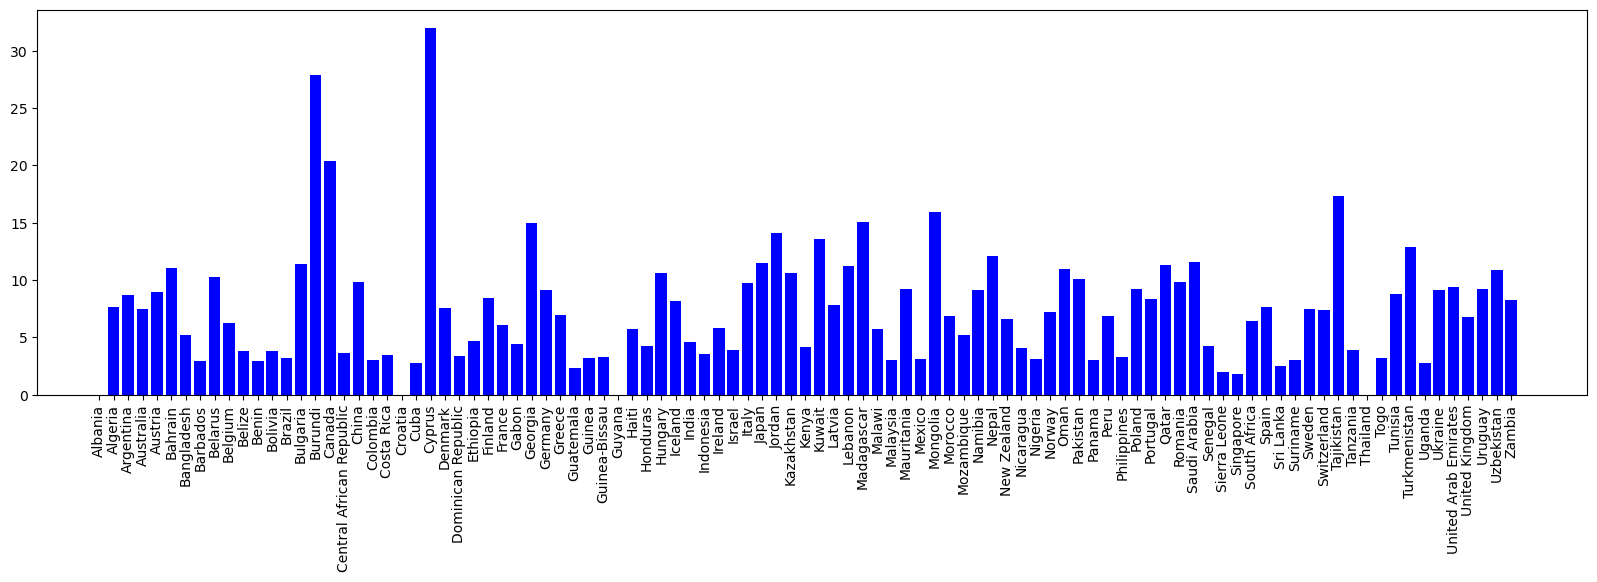

In [12]:
# Plot a bar chart
plt.figure(figsize=(20,5))
plt.bar(x_axis, Pareto_df["Temp_difference"], color='b', align="edge")
plt.xticks(tick_locations, Pareto_df["Country"], rotation="vertical")
plt.show()


In [48]:
avg_temp_per_continent = Temp_CO2_Merged.groupby(['Continent'])['Temp_difference'].mean().reset_index()
avg_temp_per_continent

,Continent,Temp_difference
0,Africa,6.478014
1,Asia,9.275903
2,Europe,9.484406
3,North America,4.935863
4,Oceania,7.008815
5,South America,5.390586


<Axes: title={'center': 'Temp Difference by Continent'}, xlabel='Continent', ylabel='Temp Difference'>

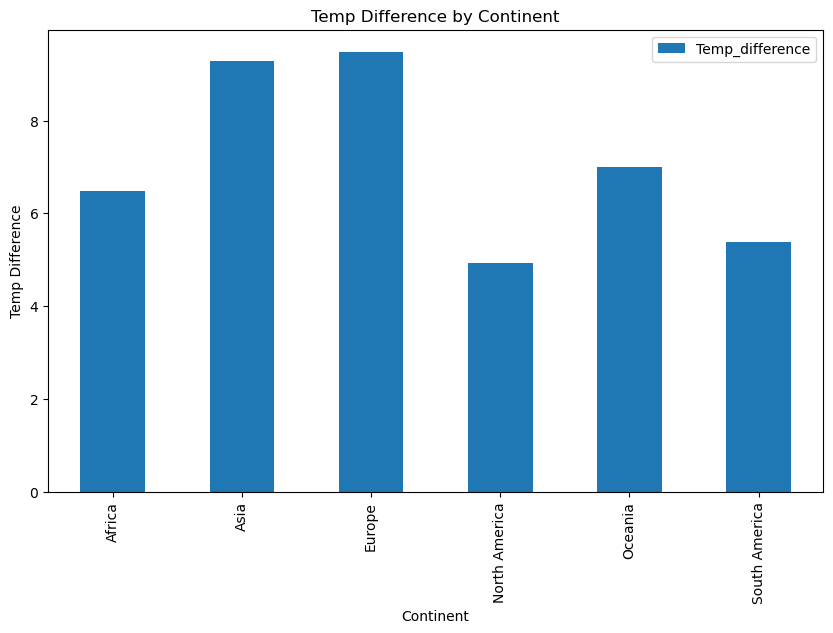

In [49]:
# plt.figure(figsize=(20,5))
# plt.bar(x_axis, avg_temp_per_continent["Temp_difference"], color='b', align="edge")
# plt.xticks(tick_locations, avg_temp_per_continent["Continent"], rotation="vertical")

# avg_temp_per_continent.plot(kind = 'bar', y=')

bar_chart = avg_temp_per_continent.plot(kind='bar', x='Continent', figsize=(10, 6))

# Set the title and labels
bar_chart.set_title("Temp Difference by Continent")
bar_chart.set_xlabel("Continent")
bar_chart.set_ylabel("Temp Difference")

# Show the bar chart
bar_chart

In [52]:
def find_min_max_row(Temp_CO2_Merged, row_index2):
    # Filter columns to include only those with "CO2" in their names
    co2_columns = [col2 for col2 in Temp_CO2_Merged.columns if "CO2" in col2.upper()]

    # Initialize min and max with None
    min_val = 9999999
    max_val = 0

    # Check if there are any CO2 columns
    if co2_columns:
        # Loop through each value in the filtered columns
        for value2 in Temp_CO2_Merged[co2_columns].iloc[row_index2]:
            if value2 < min_val:
                min_val = value
            if value > max_val:
                max_val = value

    return min_val, max_val
min_co2_list = []
max_co2_list = []

# Loop through the rows of the DataFrame
for row_index2 in Temp_CO2_Merged.index:
    # Find the min and max values for the row
    min_max = find_min_max_row(Temp_CO2_Merged, row_index2)
    # Append the result to the min_co2_list and max_co2_list
    min_co2_list.append(min_max[0])
    max_co2_list.append(min_max[1])
min_co2_list, max_co2_list

NameError: name 'row_index2' is not defined

In [15]:
# Which country had the highest change in Temperature
plt.figure(figsize=(20,5))
plt.bar(x_axis, Temp_CO2_Merged["Temp_1990"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, Temp_CO2_Merged["Continent"], rotation="vertical")
plt.show()

KeyError: 'Temp_1990'

<Figure size 2000x500 with 0 Axes>

In [ ]:
# Which country changed the most CO2
plt.figure(figsize=(20,5))
plt.bar(x_axis, Temp_CO2_Merged["Temp_1990"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, Temp_CO2_Merged["Country"], rotation="vertical")
plt.show()

In [ ]:
# Which year saw the greatest increase in temp, in CO2

In [ ]:
# Rate of increase across all countries for both CO2 and Temp

In [ ]:
# Comparison of countries to “World”

In [ ]:
# Africa to Europe (land mass sq ft/ CO2)

In [ ]:
# Compare North America to Europe ( land mass sq ft/ CO2)